# Logistic Regression 

When the result of a classification problem is a discrete variable, logistic regression is used to solve the problem. We often utilize it to address binary classification issues. 

Types of logistic regression

Binary 

Multi 

## Sigmoid function

We apply the sigmoid function in machine learning to convert predictions to probabilities.
    $$\sigma(z)=\frac{1}{1+e^{-z}}.$$



In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import math

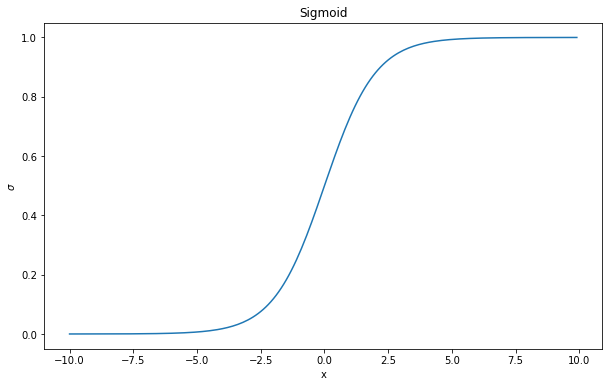

In [2]:
x=np.arange(-10, 10, .1)
y=np.array([1/(1+math.exp(- i)) for i in x])
plt.figure(figsize = (10, 6))
plt.plot(x, y)
plt.title('Sigmoid')
plt.xlabel('x')
plt.ylabel('$\sigma$')
plt.show()

# Binary case

let $p=\sigma(X)$, the probability of observing the posetive class, then we solve for x to be $p=\frac{1}{1+e^{-X}}$ so $e^{X}=\frac{p}{p-1}$ therefore $X=ln(\frac{p}{q})$ where is q is the probability of negetive class. Since $\frac{p}{q}$ is odd ratio then $ln(\frac{p}{q})$ is called log odds. Logistic regression is considered a linear model because the features included in $X$ are, in fact, only subject to a linear combination when the response variable is considered to be the log odds. In summary for the feature $x_1,\cdots,x_n$ we have
$$ \omega_0+\omega_1x_1+\cdots+\omega_n x_n=\omega^T X=ln(\frac{p}{q}).$$

















For simplisity, let us show the sigmoid function with $g$. If the probobility of y=1 to be $P[y=1| X,\omega]=g(\omega^T X)$ then $P[y=0| X,\omega]=1-g(\omega^T X)$ therefore the probability y is 
 $$P[y|X,\omega]=g(\omega^T X)^y (1-g(\omega^T X))^{1-y}$$

Determain $\omega$ by maximaizing $L(\omega)=P[y|X,\omega]$. Let us assume that train data set is independent then we have 
                                     $$𝑃[𝑦|𝑋,𝜔]=\prod_{i=1}^m P[y^i| x^i, \omega] $$
Take the log from both side of the equation we lave 
                                     $$l(\omega)=log(L(\omega))=\sum_{i=1}^m log(P[y^i| x^i, \omega]) $$
                                     $$l(\omega)=\sum_{i=1}^m y^ilog(g(\omega^T x^i))+(1-y^i)log((1-g(\omega^Tx^i)))$$
                                     $$l(\omega)=\sum y_i \omega x_i-log(1+e^{(\omega x_i)})$$
                                     
we use Newton Raphson method to calculate Gradient Descent for finding the maximum of the $l(\omega)$.
                     $$\frac{\partial l}{\partial \omega_j} =\sum_i (y^i- g(\omega^T x^i))x^j=X^T.(Y-\hat{Y}) $$
                         $$\frac{\partial^2 l}{\partial \omega^2}=-\sum_i g(x_i)(1-g(x_i))x_i^T x_i =-X^Tg(1-g)X$$
Therefore, new $\omega$ is of the following form 
$$ \omega_n=\omega_p+(X^Tg(1-g)X)^{-1}X(Y-\hat{Y})$$
predict y=1 if $g(\omega^T X)>=.5$, zero otherwise. 

In [3]:
import math
class logistic_regression:
    def __init__(self,X_train, y_train):
        self.X_train = X_train
        self.y_train = y_train 
 
        
    def predict(self,omega,X):
        pred=np.dot(X,omega.T)
        return pred
    
    def sigmoid(self, z):
        if type(z)==type(1.0) or type(z)==type(np.float64(2.34254)):
            return 1/(1+math.exp(-z))
        if type(z)==type(np.array([1])):
            z1=[]
            for i in z:
                z1.append(1/(1+math.exp(-i)))
            return np.array(z1)
    
    
    def cost_function(self,omega,X_train, y_train):
        X_train=self.X_train
        y_train=self.y_train
        m=len(y_train)
        l=sum([ y_train[i]*self.predict(X_train[i],omega)-np.log(1+math.exp(self.predict(X_train[i],omega))) for i in range(m) ])
        return l

        
        
    def Gradient_descent(self,X_train, y_train, N_iteration):
                n=X_train.shape[1]
                omega=np.zeros(n)
                X_train=self.X_train
                y_train=self.y_train
                m=len(y_train)
                gradient=np.dot(X_train.T,y_train-self.sigmoid(self.predict(omega,X_train)))
                ggradient=-np.dot(X_train.T,np.dot(np.dot(self.sigmoid(self.predict(omega,X_train)),(1-self.sigmoid(self.predict(omega,X_train)))), X_train))
                cost=[]
                for j in range(N_iteration):
                    omega=omega-np.dot(gradient, np.linalg.inv(ggradient))
                    cost.append(self.cost_function(omega,X_train,y_train))
                
                return omega , np.array(cost)
    
    def decision_boundary(self,omega , X):
            prob=self.sigmoid(self.predict(omega , X))
            return 1 if prob >= .5 else 0            
    
    def classification(self,omega,X):
        decision_boundary = np.array([self.decision_boundary(omega, X[i]) for i in range(len(X))])
        return decision_boundary
    def accurecy(self, omega,X, y_train):
        y_pred=self.classification(omega,X)
        acc=[]
        for i in range(len(y_train)):
            acc.append(abs(y_train[i]-y_pred[i]))
        return 1-sum(acc)/len(y_train)
    

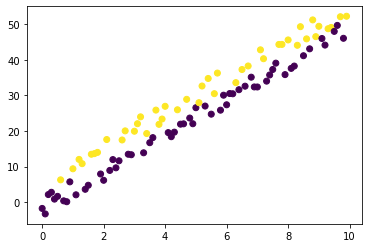

In [4]:
import random
x=np.array([i/10 for i in range(0,100)])
y=np.array([2+5*j+random.uniform(-6,6) for j in x])
z=[]
for i in x:
    j=int(i*10)
    t=2+5*i-y[j]
    if t>0:
        z.append(0)
    else:
        z.append(1)
z=np.array(z)
plt.scatter(x, y, c =z)

In [5]:
X= np.c_[x,y]      
intercept_ones = np.ones((len(X),1))        
X_b = np.c_[intercept_ones,X]
lg_R=logistic_regression(X_b,z)

In [6]:
lg_R.Gradient_descent(X_b,z,100)[0]

array([-1.10078591, -2.45954753,  0.49763412])

In [7]:
print(0.92245058/0.46167833, 2.31287344/0.46167833)

1.9980374214228334 5.009707603127052


In [8]:
omega=np.array([-0.92245058, -2.31287344,  0.46167833])
lg_R.classification(omega,X_b)

array([0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1,
       0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0,
       1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1,
       0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0,
       1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1])

In [9]:
lg_R.accurecy(omega,X_b,z)

0.99

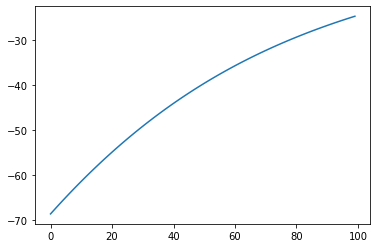

In [10]:
cost=lg_R.Gradient_descent(X_b,z,100)[1]
plt.plot(range(len(cost)), cost)

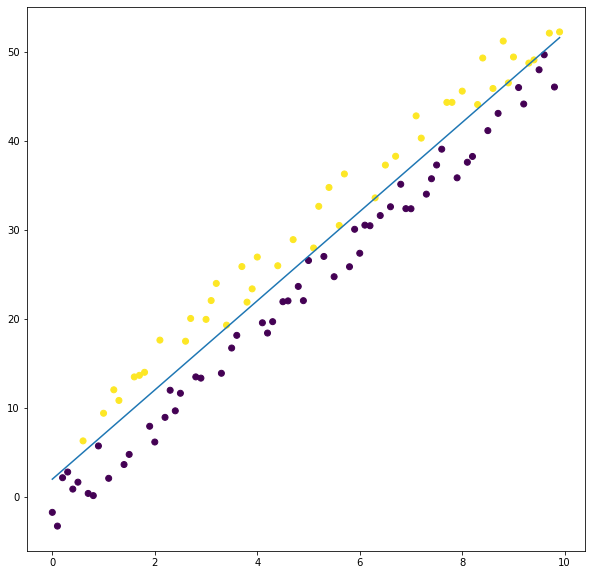

In [11]:
plt.figure(figsize=(10,10))
plt.scatter(x, y, c =z)
plt.plot(x, 1.9980374214228334+5.009707603127052*x)

In [13]:
from sklearn.linear_model import LogisticRegression

In [14]:
scikit_log_reg = LogisticRegression()
scikit_log_reg.fit(X,z)

LogisticRegression()

In [15]:
scikit_log_reg.coef_

array([[-3.88694079,  0.80711584]])

In [16]:
scikit_log_reg.intercept_

array([-2.37182755])

In [17]:
scikit_log_reg.predict(X)

array([0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1,
       0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0,
       1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1,
       0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0,
       1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1])

In [18]:
1-sum(abs(z-scikit_log_reg.predict(X)))/len(z)

0.98

# Multi_class logistic regression 

##  One Vs Rest

If the target value y contains $k>=2$ classes we need $k$ hyperplane $\omega_i^T X=\omega_i^0+\omega_i^1 x_1+\cdots+\omega_n $ for $i=1,\cdots,k$ to separate data into $k$ classes. Each time we consider a class as 1 and the rest as 0. Therefore, we need $k$ vectors $\omega_i\in \mathbb{R}^n$ where $n$ is the number of features X and we show tham with vector $W=[\omega_1,\cdots,\omega_k]^T$. 



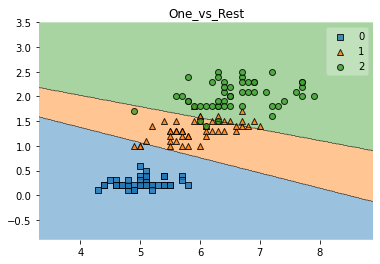

In [19]:
from mlxtend.data import iris_data
from mlxtend.plotting import plot_decision_regions
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
# Loading Data

X, y = iris_data()
X = X[:, [0, 3]] # sepal length and petal width
clf = LogisticRegression(random_state=0, multi_class='ovr')
clf.fit(X, y)

plot_decision_regions(X, y, clf=clf)
plt.title('One_vs_Rest')
plt.show()



In [20]:
clf.coef_

array([[-1.39553768, -3.91213769],
       [-0.07787636,  0.38321651],
       [ 0.74494462,  3.98418826]])

In [21]:
clf.intercept_

array([ 10.46337925,  -0.70720715, -11.28150669])